<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h1 style="color: #A2AAAD; margin: 50px auto 0;">Deep Q Learning Data Analysis</h1>
    <p style="color: #A2AAAD; margin: 10px auto 50px; font-size: 20px; height:80%;">Chandler Scott</p>
</div>

<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 20px auto; line-height:100%;">
        Read data into DataFrame
    </h3>
</div>

In [3]:
import pandas as pd

csv_file = 'legal-1layer-stats.csv'


df = pd.read_csv(f'out/{csv_file}', index_col=0)
df


,NumberEpisodes,MemorySize,BatchSize,EpsilonStart,EpsilonEnd,EpsilonDecay,Tau,Gamma,LearningRate,WinReward,LossReward,legalMoveReward,IllegalMoveReward,Outcome,NumberIllegalMoves,Explore/Exploit
EpisodeNumber,,,,,,,,,,,,,,,,
0,250000,10000,128,0.9,0.05,1000,0.005,0.99,0.1,10.0,10.0,10.0,-10.0,-1,1,1.000000
1,250000,10000,128,0.9,0.05,1000,0.005,0.99,0.1,10.0,10.0,10.0,-10.0,-1,1,1.000000
2,250000,10000,128,0.9,0.05,1000,0.005,0.99,0.1,10.0,10.0,10.0,-10.0,-1,6,0.700000
3,250000,10000,128,0.9,0.05,1000,0.005,0.99,0.1,10.0,10.0,10.0,-10.0,-1,2,0.833333
4,250000,10000,128,0.9,0.05,1000,0.005,0.99,0.1,10.0,10.0,10.0,-10.0,1,9,0.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,250000,10000,128,0.9,0.05,1000,0.005,0.99,0.1,10.0,10.0,10.0,-10.0,1,0,0.000000
4999996,250000,10000,128,0.9,0.05,1000,0.005,0.99,0.1,10.0,10.0,10.0,-10.0,1,3,0.000000
4999997,250000,10000,128,0.9,0.05,1000,0.005,0.99,0.1,10.0,10.0,10.0,-10.0,1,4,0.000000


<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 20px auto; line-height:100%;">
        Plot Learning over Time
    </h3>
</div>

1-500000:	11.496644993289987
500001-1000000:	11.518833037666075
1000001-1500000:	11.405342810685621
1500001-2000000:	11.455576911153821
2000001-2500000:	11.264226528453056
2500001-3000000:	11.191390382780765
3000001-3500000:	11.712677425354851
3500001-4000000:	11.581969163938329
4000001-4500000:	11.039088078176157
4500001-5000000:	11.269400538801078
5000001-5500000:	11.408382816765634
5500001-6000000:	11.445528891057782
6000001-6500000:	11.33748067496135
6500001-7000000:	11.188642377284754
7000001-7500000:	11.445472890945782
7500001-8000000:	11.504129008258017
8000001-8500000:	11.386734773469547
8500001-9000000:	11.45737091474183
9000001-9500000:	11.406576813153626
9500001-10000000:	11.349005396021584


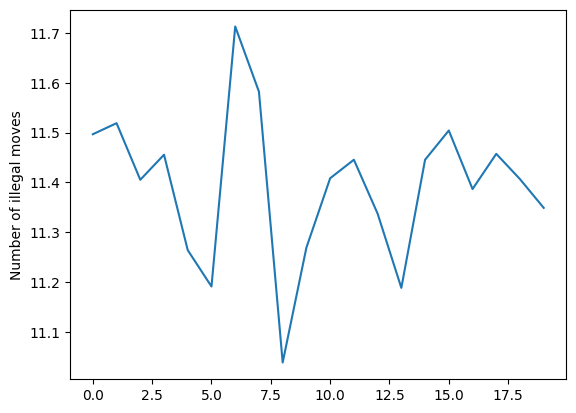

In [58]:
import matplotlib.pyplot as plt
import numpy as np
# n = group size
n = 500000


# Create the figure and axis objects
averages = [df['NumberIllegalMoves'][x:x+n-1].mean()
            for x in range(1, 5000000, 250000)]
print(f"Averages {n}:")
for i, item in enumerate(averages):
    print(f"{(i*n) + 1}-{(i+1) * n}:\t{item}")
plt.plot(averages)

plt.ylabel('Number of illegal moves')

# Show the plot
plt.show()


# print(df.groupby(df.index // n)['NumberIllegalMoves'].last())
